<a href="https://colab.research.google.com/github/Srabontideb/Machine_Learning-model_Implementations/blob/main/scikit_learn_%26_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing required packages
!pip install seaborn
!pip install sklearn
!pip install -U scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
#loading dataset
irish_dataset = pd.read_csv("/content/iris.csv")

In [9]:
irish_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
irish_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
irish_dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [14]:
#preprocessing data
bins =(0,1,3)
group_names = ['bad', 'good']
irish_dataset['petal.width'] = pd.cut(irish_dataset['petal.width'], bins = bins, labels = group_names)
irish_dataset['petal.width'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [15]:
label_quality = LabelEncoder()

In [16]:
irish_dataset['petal.width'] = label_quality.fit_transform(irish_dataset['petal.width'])

In [17]:
irish_dataset.head(60)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0,Setosa
1,4.9,3.0,1.4,0,Setosa
2,4.7,3.2,1.3,0,Setosa
3,4.6,3.1,1.5,0,Setosa
4,5.0,3.6,1.4,0,Setosa
5,5.4,3.9,1.7,0,Setosa
6,4.6,3.4,1.4,0,Setosa
7,5.0,3.4,1.5,0,Setosa
8,4.4,2.9,1.4,0,Setosa
9,4.9,3.1,1.5,0,Setosa


In [18]:
irish_dataset['petal.width'].value_counts()

1    93
0    57
Name: petal.width, dtype: int64

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Supervised Learning on irish dataset**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [22]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['Species'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['Species'].unique()

In [25]:
print("Species name:", iris_data['target_names'])

Species name: ['setosa' 'versicolor' 'virginica']


In [26]:
df.shape

(150, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [28]:
df.isnull().sum()             # for checking is any attribute's value is null or not

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

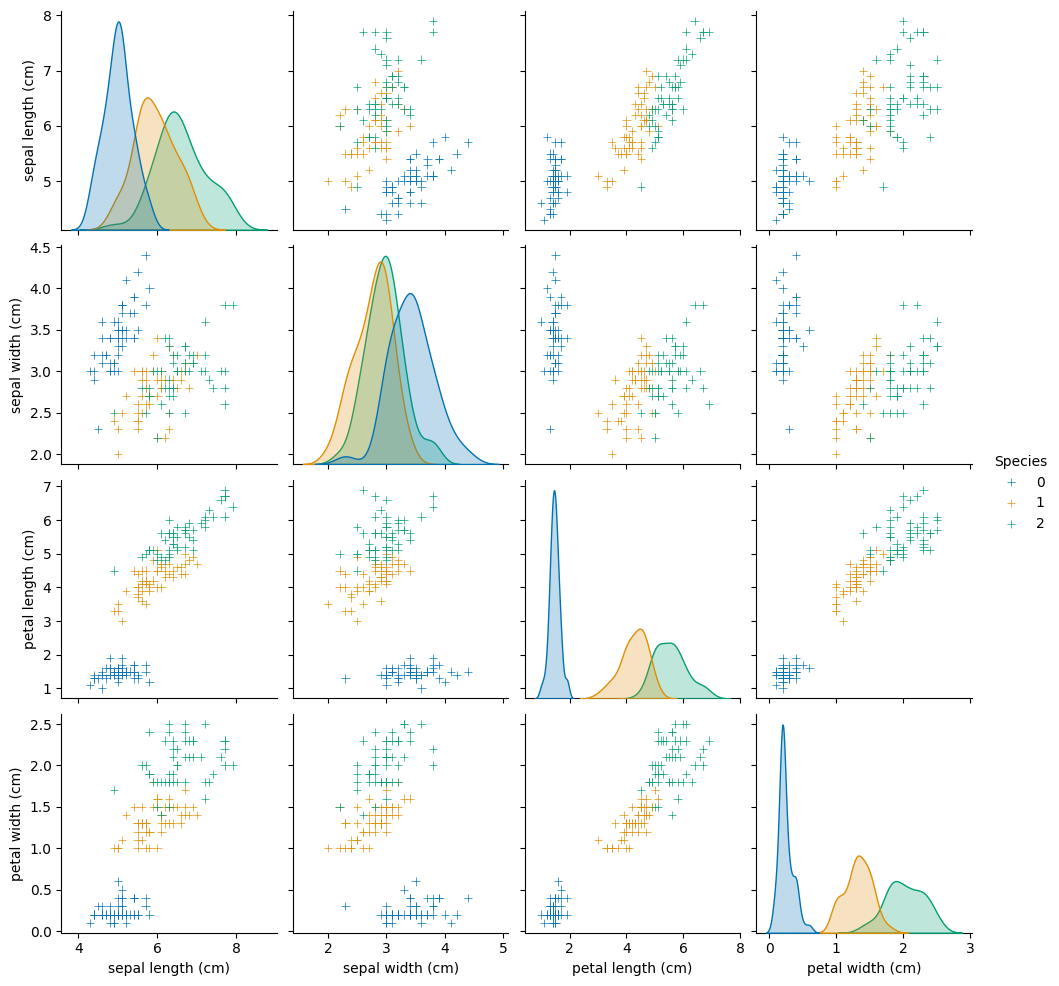

In [31]:
sns.pairplot(df, hue='Species', markers='+', palette='colorblind')
plt.show()

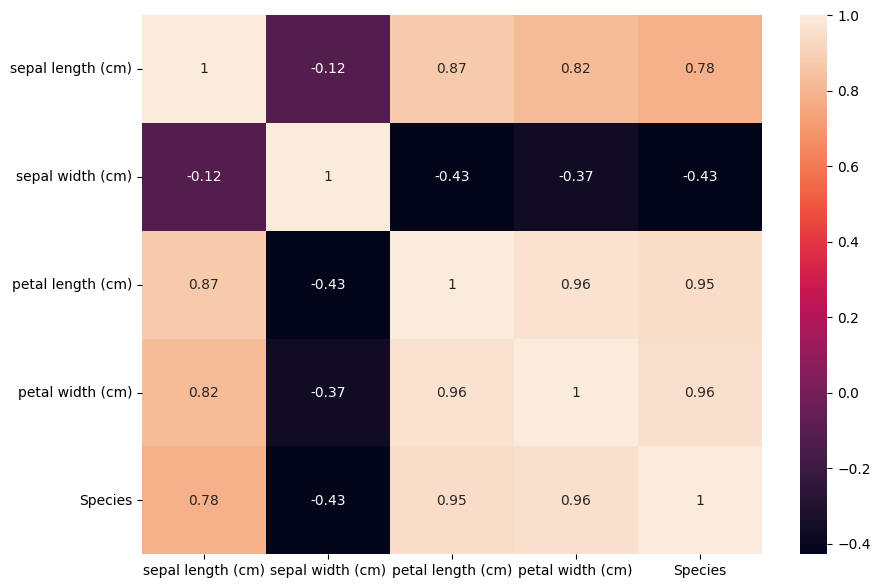

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

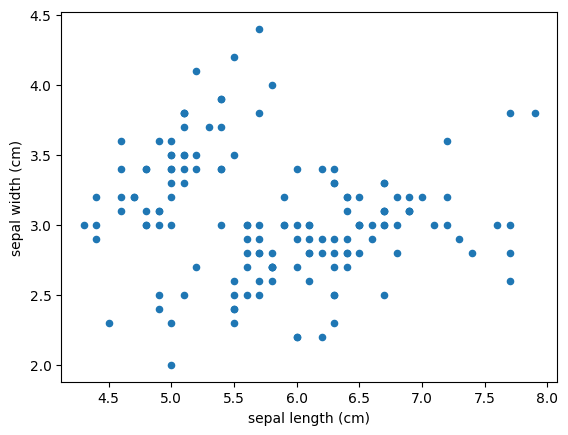

In [33]:
df.plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)")
plt.show()

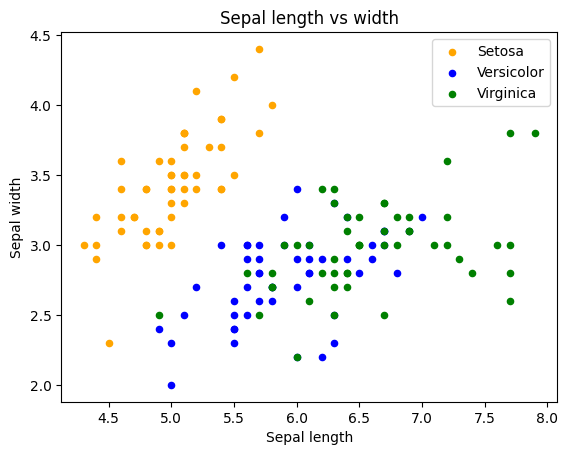

In [34]:
fig = df[df.Species==0].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)",
color='orange', label='Setosa')
fig = df[df.Species==1].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)",
color='blue', label='Versicolor', ax=fig)
fig = df[df.Species==2].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)",
color='green', label='Virginica', ax=fig)

fig.set_xlabel("Sepal length")
fig.set_ylabel("Sepal width")
fig.set_title("Sepal length vs width")
plt.show()

<Axes: xlabel='Species', ylabel='sepal length (cm)'>

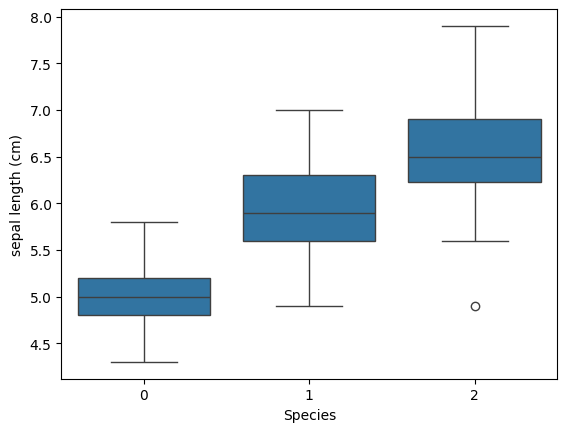

In [35]:
sns.boxplot(x="Species", y="sepal length (cm)", data=df)

<Axes: xlabel='Species', ylabel='sepal length (cm)'>

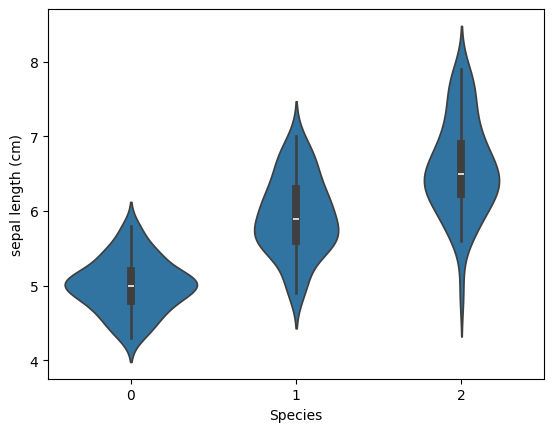

In [36]:
sns.violinplot(x="Species", y="sepal length (cm)", data=df)

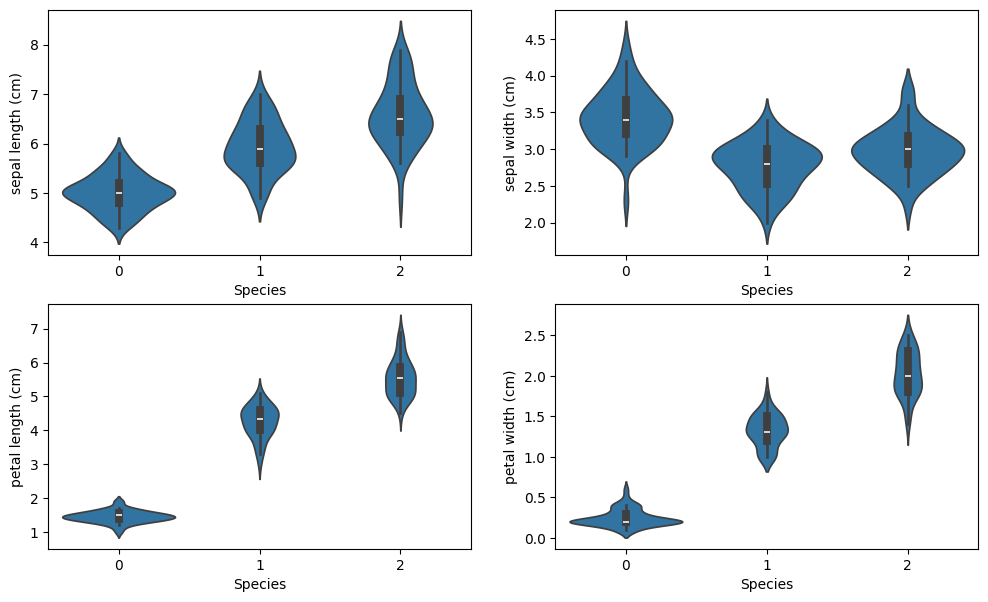

In [37]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x="Species", y="sepal length (cm)", data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species", y="sepal width (cm)", data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species", y="petal length (cm)", data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species", y="petal width (cm)", data=df)
plt.show()

In [38]:
x= df.drop('Species', axis=1)
y=df['Species']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
print("x_train:", x_train.shape)
print("x_test", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (120, 4)
x_test (30, 4)
y_train: (120,)
y_test: (30,)


In [42]:
#initilizatrion
dtree = DecisionTreeClassifier()

#tranning
dtree.fit(x_train, y_train)

#testing
dtree_pred = dtree.predict(x_test)

dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 100.00%


In [43]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
print(confusion_matrix(y_test, dtree_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.3076923076923077, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = ve

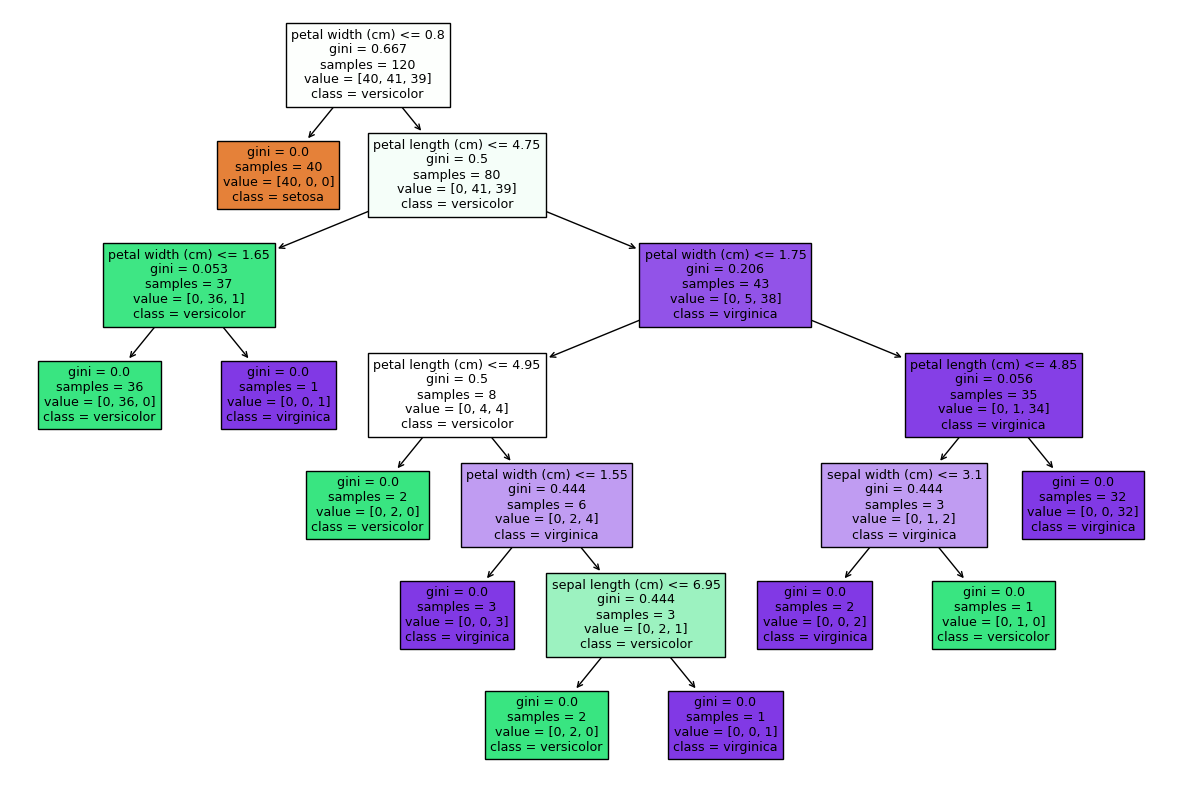

In [45]:
plt.figure(figsize=(15,10))
plot_tree(dtree, feature_names=iris_data.feature_names, class_names= list(iris_data['target_names']), filled=True)

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(knn_acc*100))

Test accuracy: 100.00%


In [47]:
print(confusion_matrix(y_test, knn_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [48]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


from matplotlib import pyplot as plt
_df_0['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [51]:
data = {'sepal length (cm)':5.0, 'sepal width (cm)':3.4, 'petal length (cm)':1.4,
       'petal width (cm)':0.2}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.4,0.2


In [52]:
value_pred = dtree.predict(new_df)
value_pred

array([0])